In [1]:
#digit recognition mnist datatset
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
training_data = pd.read_csv('train.csv',dtype=np.float32)
training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
x = training_data.iloc[:,1:].values
y = training_data.iloc[:,0].values.reshape(-1,1)
print x.shape,y.shape

(42000, 784) (42000, 1)


[ 1.]
[ 0.]
[ 1.]
[ 4.]
[ 0.]


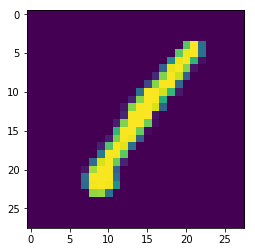

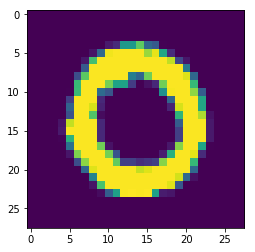

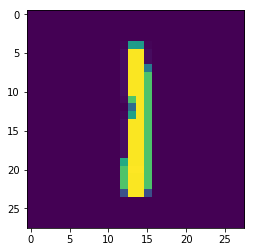

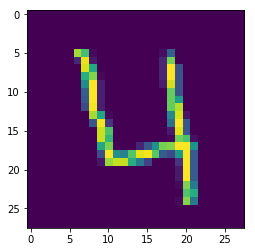

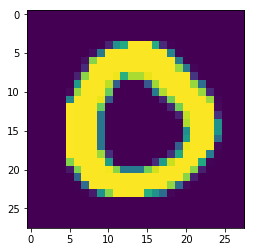

In [4]:
#printing sample images
pixel_size = 28
for i in range(5):
    sample = x[i,:].reshape(pixel_size,pixel_size)
    plt.figure()
    plt.imshow(sample)
    print y[i]

In [5]:
#apply pca to reduce number of dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components = 300)
x = pca.fit_transform(x)
print x.shape

(42000, 300)


In [6]:
#preprocessing of data
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x = x_scaler.fit_transform(x)

from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
one_hot_labels = ohc.fit_transform(y).toarray()
print one_hot_labels.shape

(42000, 10)


In [7]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,one_hot_labels,test_size = 0.15)
print "training : ",train_x.shape,train_y.shape
print "testing : ",test_x.shape,test_y.shape

training :  (35700, 300) (35700, 10)
testing :  (6300, 300) (6300, 10)


In [8]:
#sigmoid activation function
def softmax(x):
    return np.exp(-x)/np.sum(np.exp(-x),axis=1,keepdims=True)

#model
def predict(x,w,b):
    return softmax(np.dot(x,w) + b)

def compute_loss(x,y,w,b,lamb = 0):
    a = predict(x,w,b)
    val = -np.sum(np.sum(y*np.log(a)))/y.shape[0]
    val += (lamb/2)*np.sum(np.sum(w**2))/y.shape[0]
    return val,a

def compute_accuracy(one_hot_labels,predictions):
    val = sum(np.argmax(one_hot_labels,axis=1) == np.argmax(predictions,axis=1))
    return val/one_hot_labels.shape[0]

training loss at step 0 is 2.35
testing accuracy at step 0 is 14.29%
training loss at step 100 is 1.03
testing accuracy at step 100 is 83.92%
training loss at step 200 is 0.69
testing accuracy at step 200 is 87.06%
training loss at step 300 is 0.48
testing accuracy at step 300 is 88.54%
training loss at step 400 is 0.53
testing accuracy at step 400 is 88.97%
training loss at step 500 is 0.49
testing accuracy at step 500 is 89.30%
training loss at step 600 is 0.25
testing accuracy at step 600 is 89.48%
training loss at step 700 is 0.37
testing accuracy at step 700 is 89.76%
training loss at step 800 is 0.19
testing accuracy at step 800 is 89.83%
training loss at step 900 is 0.38
testing accuracy at step 900 is 90.27%
training loss at step 1000 is 0.31
testing accuracy at step 1000 is 90.19%


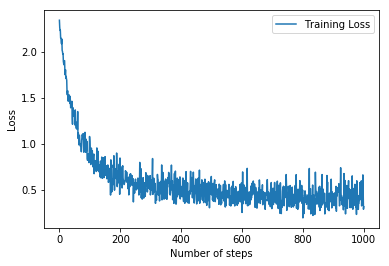

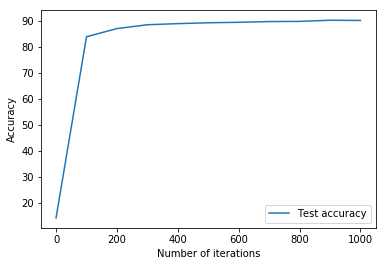

In [9]:
##training
n,m = train_x.shape
n_labels = len(np.unique(y))
#initialize the variables
w = np.random.randn(m,n_labels)*0.01
b = np.zeros((1,n_labels))

#hyperparameters
n_iter = 1001
batch_size = 64
learning_rate = 0.001
regular_lambda = 0.1
train_loss = []
test_accs = []

for step in range(n_iter):
    k = (step*batch_size) % (n - batch_size)
    batch_x = train_x[k:k+batch_size,:]
    batch_y = train_y[k:k+batch_size,:]

    l,a = compute_loss(batch_x,batch_y,w,b,lamb=regular_lambda)
    
    #update the weights
    de = (batch_y-a)
    w -= learning_rate*(np.dot(batch_x.T,de) + (regular_lambda*w)/batch_size) 
    b -= learning_rate*np.sum(de,axis=0)/batch_size
    
    if step%100 == 0:
        print "training loss at step %d is %.2f" %(step,l)
        test_acc = 100.0*compute_accuracy(test_y,predict(test_x,w,b))
        test_accs.append(test_acc)
        print "testing accuracy at step %d is %.2f%%" %(step,test_acc)
    train_loss.append(l)

plt.plot(range(n_iter),train_loss,label= "Training Loss")
plt.xlabel('Number of steps')
plt.ylabel('Loss')
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_iter,100),test_accs,label = 'Test accuracy')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.legend()

In [10]:
print "Final accuracy of the model  : %.2f%%" %(100.0*compute_accuracy(test_y,predict(test_x,w,b)))

Final accuracy of the model  : 90.19%
